In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def phi_f(x):
    if np.abs(x)>5:
        return x**2
    return np.exp(-x)
def cov_func(x1,x2):
    return phi_f(x1)*phi_f(x2) #np.exp(-(x1-x2)**2/2) #(x1**2+x1)*(x2**2+x2)

def cov_mat_1(x):
    cov_mat = np.zeros([len(x),len(x)])
    for i in range(len(x)):
        for j in range(i,len(x)):
            cov_mat[i,j] = cov_func(x[i],x[j])
            cov_mat[j,i] = cov_mat[i,j]
    return cov_mat

def cov_mat_2(x1,x2):
    cov_mat = np.zeros([len(x1),len(x2)])
    for i in range(len(x1)):
        for j in range(len(x2)):
            cov_mat[i,j] = cov_func(x1[i],x2[j])
    return cov_mat

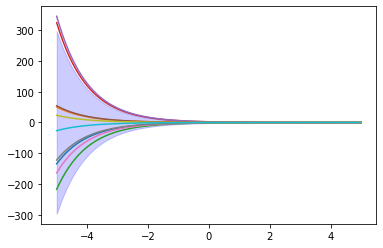

In [5]:
N = 200
x = np.linspace(-5,5, num=N)
S = cov_mat_1(x)
up_y = 2*np.sqrt(np.diag(S))
down_y = -2*np.sqrt(np.diag(S))
ax=plt.figure()
for i in range(10):
    y = np.random.multivariate_normal(np.zeros_like(x), S)
    plt.plot(x,y)
plt.fill_between(x, up_y, down_y,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill


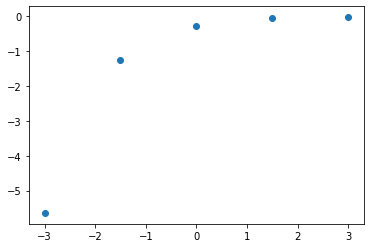

In [6]:
x1 = np.linspace(-3,3,num=5)
y1 = np.random.multivariate_normal(np.zeros_like(x1),cov_mat_1(x1))
plt.scatter(x1,y1)

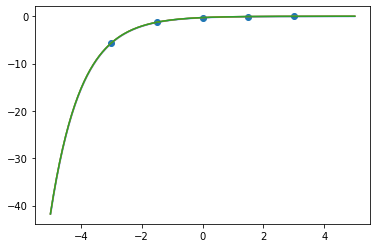

In [7]:
x2 = np.linspace(-5,5,num=200)
M = np.linalg.pinv(cov_mat_1(x1))
cm = cov_mat_2(x2,x1).dot(M.dot(y1))
cS = cov_mat_2(x2,x2) - (cov_mat_2(x2,x1).dot(M)).dot(cov_mat_2(x1,x2))
up_y2 = cm + 2*np.sqrt(np.abs(np.diag(cS)))
down_y2 = cm - 2*np.sqrt(np.abs(np.diag(cS)))
plt.scatter(x1,y1)
for i in range(3):
    y2 = np.random.multivariate_normal(cm, cS)
    plt.plot(x2,y2)
plt.fill_between(x2, up_y2, down_y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
#plt.plot(x2,cm)

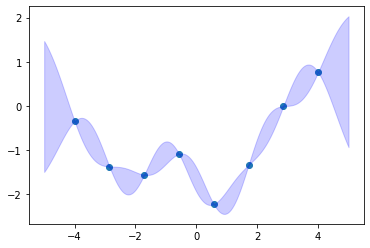

In [201]:
plt.scatter(x1,y1)
plt.fill_between(x2, up_y2, down_y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

In [202]:
np.diag(cS)

array([5.47682651e-01, 5.06468017e-01, 4.64412458e-01, 4.21909301e-01,
       3.79385228e-01, 3.37291273e-01, 2.96092156e-01, 2.56254237e-01,
       2.18232439e-01, 1.82456589e-01, 1.49317700e-01, 1.19154769e-01,
       9.22426742e-02, 6.87817894e-02, 4.88898610e-02, 3.25966563e-02,
       1.98417758e-02, 1.04759015e-02, 4.26559620e-03, 9.01602869e-04,
       1.04088330e-05, 1.16866441e-03, 3.91987692e-03, 7.79265670e-03,
       1.23196795e-02, 1.70564582e-02, 2.15989938e-02, 2.55994049e-02,
       2.87787152e-02, 3.09361148e-02, 3.19541845e-02, 3.17997904e-02,
       3.05205926e-02, 2.82373610e-02, 2.51325366e-02, 2.14357001e-02,
       1.74067983e-02, 1.33181206e-02, 9.43609977e-03, 6.00402608e-03,
       3.22671336e-03, 1.25803703e-03, 1.92084211e-04, 5.84282949e-05,
       8.21775939e-04, 2.38595184e-03, 4.60190399e-03, 7.27914858e-03,
       1.01998475e-02, 1.31345376e-02, 1.58584244e-02, 1.81671156e-02,
       1.98907169e-02, 2.09053248e-02, 2.11411370e-02, 2.05866401e-02,
      

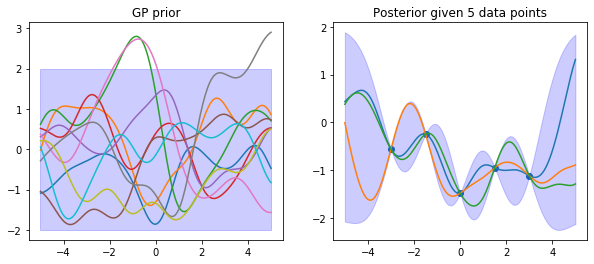

In [208]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
for i in range(10):
    y = np.random.multivariate_normal(np.zeros_like(x), S)
    plt.plot(x,y)
plt.title('GP prior')
plt.fill_between(x, up_y, down_y,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.subplot(1,2,2)
plt.scatter(x1,y1)
for i in range(3):
    y2 = np.random.multivariate_normal(cm, cS)
    plt.plot(x2,y2)
plt.title('Posterior given 5 data points')
plt.fill_between(x2, up_y2, down_y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill